In [74]:
import tensorflow as tf
import keras 
import numpy as np
import matplotlib.pyplot as plt

In [75]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [76]:
callbacks = myCallback()
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [77]:
train_images.shape

(60000, 28, 28)

In [78]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [79]:
train_labels[0]

9

In [80]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [81]:
test_images.shape

(10000, 28, 28)

In [82]:
test_labels.shape

(10000,)

In [83]:
test_images = test_images/255 #neural networks work better with normalized data
train_images = train_images/255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.29411765 0.52941176
  0.43137255 0.2745098  0.23137255 0.31764706 0.53333333 0.60392157
  0.35294118 0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.
  0.         0.03529412 0.50196078 0.83137255 0.77254902 0.80784314
  0.95686275 0.84705882 0.66666667 0.97254902 0.92156863 0.79607843
  0.90980392 0.89803922 0.50196078 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.45490196 0.69803922 0.75294118 0.71372549 0.65882353 0.59215686
  0.60392157 0.70196078 0.76862745 0.70196078 0.65098039 0.69803922
  0.73333333 0.75294118 0.80784314 0.76078431 0.24313725 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.30196078
  0.74509804 0.67843137

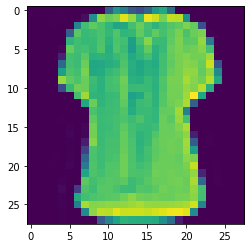

In [84]:
plt.imshow(train_images[55])
print(train_images[55])

In [85]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #Flatten takes this 28 by 28 square and turns it into a simple linear array
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax) #The last layer has 10 neurons in it because we have ten classes of clothing in the dataset.
])

In [86]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss="sparse_categorical_crossentropy")
model.fit(train_images,train_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6282
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3879

Reached 60% accuracy so cancelling training!


In [87]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3786


0.37859246134757996